In [62]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score , accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [63]:
df=pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [65]:
df.isna().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [66]:
df[['lead_source','industry','employment_status','location']]=df[['lead_source','industry','employment_status','location']].fillna('NA')

In [67]:
df['annual_income']=df['annual_income'].fillna(0.0)

In [68]:
df['industry'].mode()

,industry
0,retail


<Axes: >

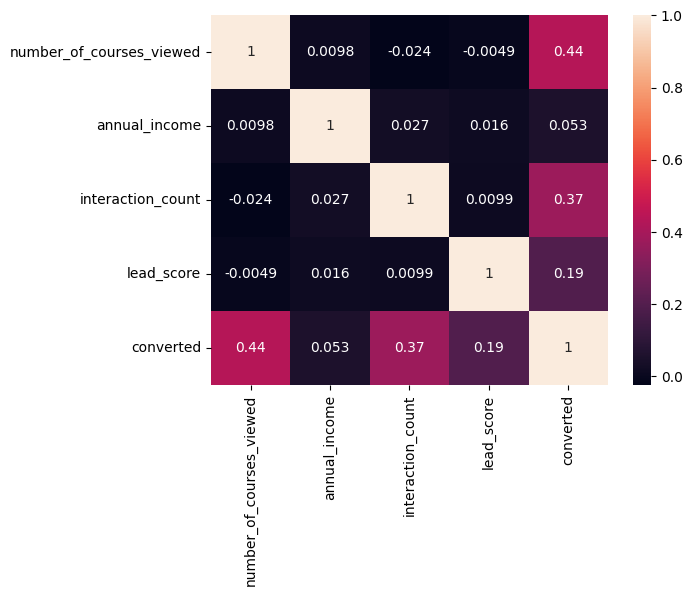

In [69]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [70]:
full_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(full_df,test_size=0.25,random_state=42)

In [71]:
y_train=train_df['converted']
y_test=test_df['converted']
y_val=val_df['converted']

del train_df['converted']
del test_df['converted']
del val_df['converted']

In [72]:
for col in ['lead_source','industry','employment_status','location']:
  print(f'mutual_info_score with {col}: {round(mutual_info_score(y_train,train_df[col]),2)})')

mutual_info_score with lead_source: 0.04)
mutual_info_score with industry: 0.01)
mutual_info_score with employment_status: 0.01)
mutual_info_score with location: 0.0)


In [73]:
encoder=DictVectorizer(sparse=False)
encoded_data=encoder.fit_transform(train_df.to_dict(orient='records'))

In [74]:
train_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
train_df.head()

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,58472.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,71738.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,81973.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,74956.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59335.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0


In [75]:
encoded_data=encoder.transform(val_df.to_dict(orient='records'))
val_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
val_df.head()

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,52220.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1,59656.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,57134.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54103.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [76]:
encoded_data=encoder.transform(test_df.to_dict(orient='records'))
test_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out())
test_df.head()

,annual_income,employment_status=NA,employment_status=employed,employment_status=self_employed,employment_status=student,employment_status=unemployed,industry=NA,industry=education,industry=finance,industry=healthcare,...,lead_source=social_media,location=NA,location=africa,location=asia,location=australia,location=europe,location=middle_east,location=north_america,location=south_america,number_of_courses_viewed
0,56070.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,78409.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,66206.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,62832.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [77]:
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(train_df,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [78]:
score=round(accuracy_score(y_val,model.predict(val_df)),2)
score

0.7

In [79]:
model_drop=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [80]:
for col in ['industry','employment_status','lead_score']:
  drop_columns=train_df.columns[train_df.columns.str.startswith(col)]
  temp_train_df=train_df.drop(drop_columns,axis=1)
  temp_val_df=val_df.drop(drop_columns,axis=1)

  model_drop.fit(temp_train_df,y_train)
  print(f'accurecy diff when dropping {col}: {score-accuracy_score(y_val,model_drop.predict(temp_val_df))}')

accurecy diff when dropping industry: 0.0003412969283276279
accurecy diff when dropping employment_status: 0.003754266211604018
accurecy diff when dropping lead_score: -0.006484641638225264


In [81]:
for c in [0.01, 0.1, 1, 10, 100]:
  model_c=LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
  model_c.fit(train_df,y_train)
  score_c=round(accuracy_score(y_val,model_c.predict(val_df)),3)
  print(f"accurecy with C={c}: {score_c}")

accurecy with C=0.01: 0.7
accurecy with C=0.1: 0.7
accurecy with C=1: 0.7
accurecy with C=10: 0.7
accurecy with C=100: 0.7
